Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


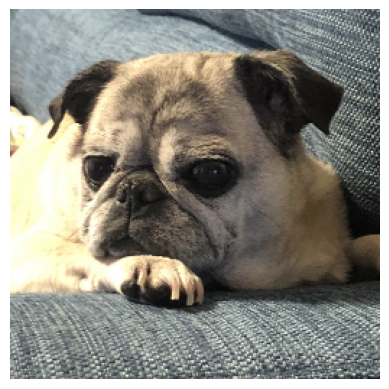

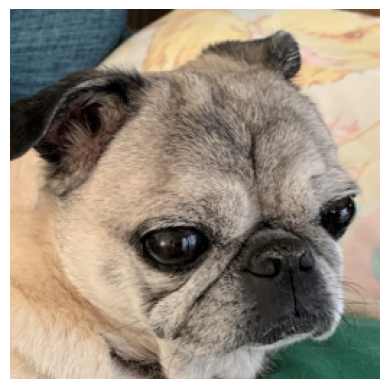

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import skimage
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread("drive/MyDrive/test1.jpg")
img1 = cv2.resize(img1, (256, 256))

img2 = cv2.imread("drive/MyDrive/test2.jpg")
img2 = cv2.resize(img2, (256, 256))

plt.imshow(img1[..., ::-1])
plt.axis("off")
plt.show()
plt.clf()

plt.imshow(img2[..., ::-1])
plt.axis("off")
plt.show()

[172. 174. 166. 151. 134. 153. 149. 132. 139. 151. 158. 164. 136. 161.
 128. 158. 158. 156. 162. 136. 159. 152. 140. 154. 143. 170. 158. 134.
 161. 134. 160. 168. 150. 180. 191. 170. 172. 215. 203. 240. 234. 240.
 216. 232. 210. 214. 226. 193. 221. 213. 200. 181. 187. 218. 201. 224.
 189. 211. 198. 210. 209. 191. 217. 238. 217. 242. 202. 236. 212. 234.
 236. 242. 254. 266. 273. 241. 245. 273. 257. 266. 249. 266. 242. 272.
 282. 253. 306. 267. 260. 318. 299. 295. 291. 317. 306. 303. 320. 299.
 337. 359. 324. 330. 332. 333. 359. 334. 335. 396. 395. 382. 400. 400.
 428. 367. 411. 392. 419. 479. 449. 422. 444. 417. 446. 430. 467. 436.
 403. 442. 475. 422. 448. 436. 468. 450. 408. 447. 465. 458. 465. 505.
 507. 476. 515. 519. 540. 515. 520. 510. 541. 511. 515. 519. 557. 532.
 512. 614. 648. 640. 718. 611. 630. 631. 598. 604. 634. 593. 655. 610.
 583. 548. 543. 495. 486. 502. 567. 532. 515. 510. 507. 476. 419. 392.
 365. 397. 367. 269. 259. 247. 239. 175. 189. 141. 140. 125. 172. 170.
 159. 

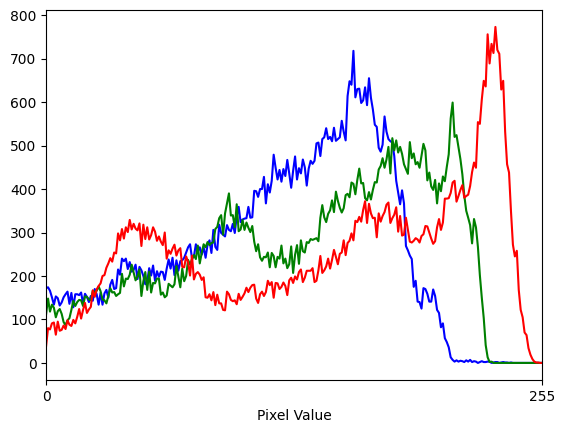

In [8]:
COLOR = ["blue", "green", "red"]

plt.xticks([0, 255])
plt.xlim([0, 255])
plt.xlabel("Pixel Value")

for c in range(3):
  hist = cv2.calcHist([img2], channels=[c], mask=None, histSize=[256], ranges=[0, 256])
  print(hist.ravel())
  plt.plot(hist, color=COLOR[c])

plt.show()

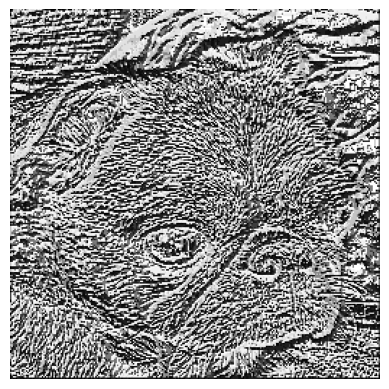

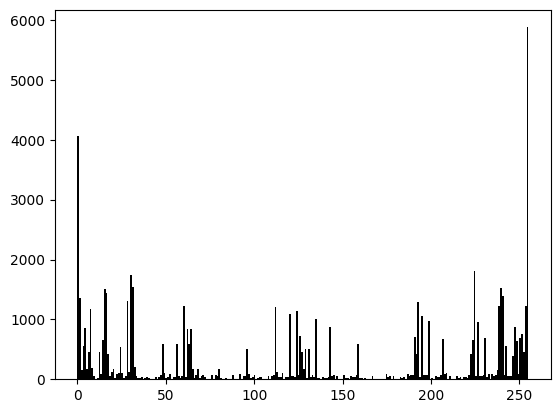

In [4]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

points = 8
radius = 1

lbp = skimage.feature.local_binary_pattern(gray, points, radius, method='default')

plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.show()
plt.clf()
plt.hist(lbp.ravel(), bins=256, range=(0, 255), color="black")
plt.show()

[0.39217517 0.36503767 0.39217517 ... 0.36568239 0.36568239 0.36568239]
(2048,)


(-0.5, 255.5, 255.5, -0.5)

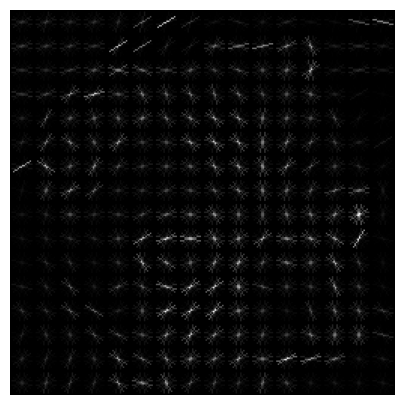

In [6]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
features, hog_img = skimage.feature.hog(gray,
                                        orientations=8,
                                        pixels_per_cell=(16, 16),
                                        cells_per_block=(1, 1),
                                        visualize=True)
plt.figure(figsize=(5, 5))
print(features)
print(features.shape)
plt.imshow(hog_img, cmap='gray')
plt.axis('off')

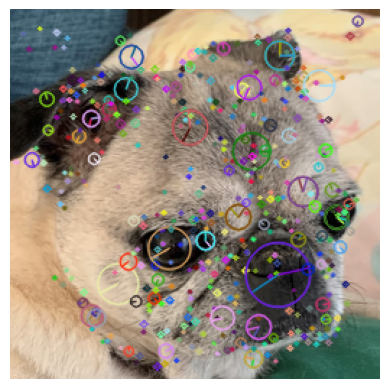

In [9]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img2, None)
img_sift = cv2.drawKeypoints(img2, keypoints, None, flags=4)
plt.imshow(img_sift[..., ::-1])
plt.axis("off")
plt.show()

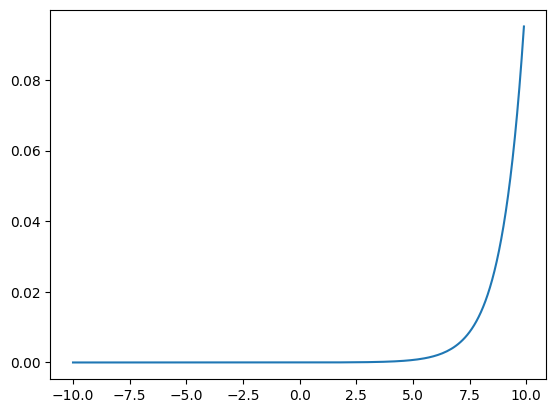

In [10]:
def linear(x):
  return x

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  z = exp_x / sum_exp_x
  return z

x = np.arange(-10.0, 10.0, 0.1)
plt.plot(x, softmax(x))
# plt.ylim(-0.1, 1.1)
plt.show()

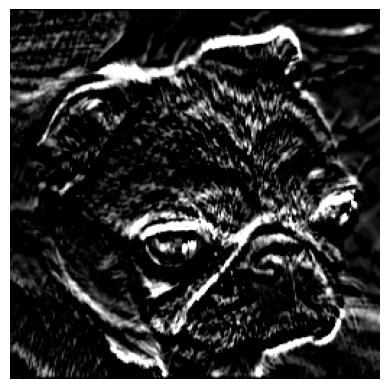

In [11]:
kernel = np.array([
    1, 2, 1,
    0, 0, 0,
    -1, -2, -1
])
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
dst = cv2.filter2D(gray, -1, kernel)
plt.imshow(dst, cmap="gray")
plt.axis("off")
plt.show()